A fim de aprofudar mais o domínio em ambas as linguagens foi desenvolvida essa quarta prova tanto em Python quanto Matlab. A seguir vão os resultados obitidos em MatLab para as 3 Modulações.

## Desenvolvimento em MatLab

### Modulação BPSK

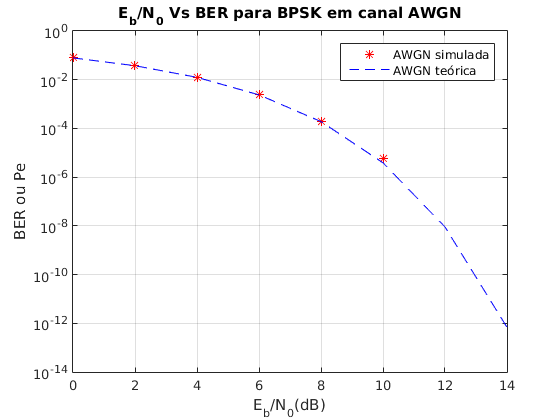

In [1]:
clear all; clc; close all
%% Parâmetros
EbN0dB = 0:2:14 ;                    %% Valores EbN0 a simular
EbN0=10.^(EbN0dB/10) ;           %% Eb/N0 em escala linear

n_bits = 1000000;                  % Número de bits
T = 50;                            % Tempo de símbolo OFDM
Ts = 2;                            % Tempo de símbolo em portadora única
K = T/Ts;                         % Número de subportadoras independentes
N = 2*K;                          % DFT de N pontos

%% Gerar bits aleatórios e Gerar constelaçao 2-QAM (BPSK)
dataIn=rand(1,n_bits)>0.5;   % Sequência de números entre 0 e 1 uniformemente distribuídos

X=2*dataIn -1;  % Sequência de -1 e 1

%% Transmissão (Construindo xn->W)
W = sqrt(N)*ifft(X); %esse será o sinal transmitido
BER_awgn_simulada = zeros(length(EbN0dB),1);
%% Loop de Eb/No
for ik = 1:length(EbN0dB)
    % Adição de ruído
    noise = 1/sqrt(2)*[(randn(n_bits,1)+j*randn(n_bits,1))] ;
    % Vetor de ruído com potência proporcional a EbNo corrente    
    n = noise*10^(-EbN0dB(ik)/20) ;
    variance(ik) = 10^(-EbN0dB(ik)/20);
    
    % sinal recebido = xn + ruído 
    r = X+n';
    % Os símbolos positivos recebidos são 1, os demais são 0 (lembrar da simbologia)
    % Receptor para o canal somente AWGN
    r_awgn = real(r) > 0 ;
    % Contador de erro para o caso com somente AWGN
    BER_awgn_simulada(ik) = sum(bitxor(dataIn,r_awgn));
    % Recepção do sinal e passagem pela FFT
    RN = W +n';
    S = 1/sqrt(N)*fft(RN);
    
    %% Plots
%     scatterplot(S)
%     hold on
%     scatter(real(X),imag(X), 'r', '+')
%     hold off
%     title(['Sinal com ruído de variância ', num2str(variance(ik))]);
    
end

BER_awgn_simulada = BER_awgn_simulada/n_bits;

%% Pe Teórica

% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5 * erfc(sqrt(EbN0));

%% Gráficos
figure(1)
% AWGN simulado
semilogy(EbN0dB,BER_awgn_simulada,'r*');
hold on;
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'b--');
hold on;
grid();
%axis([-5 20 10^(-5) 1.2])
title('E_b/N_0 Vs BER para BPSK em canal AWGN');
xlabel('E_b/N_0(dB)');
ylabel('BER ou Pe');
legend('AWGN simulada','AWGN teórica');

### Modulação 64-QAM


Para variância de 3.1623 houve 10737 símbolos errados.
Para variância de 2.5119 houve 9847 símbolos errados.
Para variância de 1.9953 houve 8671 símbolos errados.
Para variância de 1.5849 houve 7143 símbolos errados.
Para variância de 1.2589 houve 5401 símbolos errados.
Para variância de 1 houve 3386 símbolos errados.
Para variância de 0.79433 houve 1681 símbolos errados.
Para variância de 0.63096 houve 604 símbolos errados.


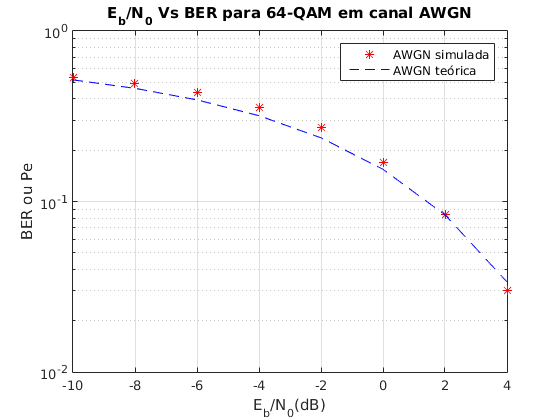

In [3]:
clear all; clc; close all
% Parâmetros
n_bits = 100000;                % Número de bits
T = 25000;                        % Tempo de símbolo OFDM
Ts = 2;                        % Tempo de símbolo em portadora única
K = T/Ts;                     % Número de subportadoras independentes
N = 2*K;                      % DFT de N pontos

EbN0dB = -10:2:4 ;             % em dB
EbN0=10.^(EbN0dB/10) ;    % linear

% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/8,8);

% Gerar constelaçao 16-QAM
seq16qam = 4*dataInMatrix(:,1)+dataInMatrix(:,2)+dataInMatrix(:,3)+dataInMatrix(:,4)+1i*(4*dataInMatrix(:,5)+dataInMatrix(:,6)+dataInMatrix(:,7)+dataInMatrix(:,8)); 
seq16=seq16qam';
% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 
%
% Construindo xn
xn = sqrt(N)*ifft(X);


% Loop de variâncias
for ik = 1:length(EbN0dB)
    
    n = 1/sqrt(2)*[(randn(length(xn),1)+j*randn(length(xn),1))] ;
    % Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10^(-EbN0dB(ik)/20) ;
    variance(ik) = 10^(-EbN0dB(ik)/20);
    
    % sinal recebido = xn + ruído 
    rn = xn+noise';
    % DFT de rn
    Y= (1/sqrt(N)) *fft(rn);
    %
    % Plots
% %     scatterplot(Y)
% %     hold on
% %     scatter(real(seq16),imag(seq16), 'r', '+')
% %     hold off
% %     title(['Sinal com ruído de variância ', num2str(variance(ik))]);
    % Demodulação  
    for k= 1:length(Y) % Para percorrer todo o vetor Yk 
         if real(Y(1,k)) > 0 % Para parte real de Yk positiva
            if real(Y(1,k)) > 6
                Z(1,k) = 7;
            else
               if real(Y(1,k)) > 4
                   Z(1,k) = 5;
               else
                  if real(Y(1,k)) > 2
                      Z(1,k) = 3;
                  else
                      Z(1,k) = 1;
                  end
               end
            end        
 
        else % Para parte real de Yk negativa ou igual a zero
              
                   
                            if real(Y(1,k)) < - 6
                                Z(1,k) = -7;
                            else
                                if real(Y(1,k)) < - 4
                                    Z(1,k) = -5;
                                else
                                    if real(Y(1,k)) < - 2
                                        Z(1,k) = -3;
                                    else
                                        Z(1,k) = -1;
                                    end
                                end
                            end
                        end
                 
           if imag(Y(1,k)) > 0 % Para parte imaginaria de Yk positiva

                            if imag(Y(1,k)) > 6
                                Z(1,k) = Z(1,k) + 1i* 7;
                            else
                                if imag(Y(1,k)) > 4
                                    Z(1,k) = Z(1,k) + 1i* 5;
                                else
                                    if imag(Y(1,k)) > 2
                                        Z(1,k) = Z(1,k) + 1i* 3;
                                    else
                                        Z(1,k) = Z(1,k) + 1i* 1;
                                    end
                                end
                            end
                                      
        else % Para parte imaginaria de Yk negativa ou igual a zero

                            if imag(Y(1,k)) < - 6
                                Z(1,k) = Z(1,k) - 1i*7;
                            else
                                if imag(Y(1,k)) < - 4
                                    Z(1,k) = Z(1,k) - 1i*5;
                                else
                                    if imag(Y(1,k)) < - 2
                                        Z(1,k) = Z(1,k) - 1i*3;
                                    else
                                        Z(1,k) = Z(1,k) - 1i*1;
                                    end
                                end
                            end
                        end
    end
    % Contagem de erro
    error(ik) = length(find(Z(1,2:K)-X(1,2:K)));
    disp(['Para variância de ', num2str(variance(ik)), ' houve ', num2str(error(ik)), ' símbolos errados.']);
end

BER_awgn_simulada = error.*5/n_bits;

%% Pe Teórica

% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.75 * erfc(sqrt(0.8*EbN0));

%% Gráficos
figure(1)
% AWGN simulado
semilogy(EbN0dB,BER_awgn_simulada,'r*');
hold on;
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'b--');
hold on;
grid();
%axis([-5 20 10^(-5) 1.2])
title('E_b/N_0 Vs BER para 64-QAM em canal AWGN');
xlabel('E_b/N_0(dB)');
ylabel('BER ou Pe');
legend('AWGN simulada','AWGN teórica');

A partir desse código também foi implementado um método de identificação dos símbolos incorretos a partir da sua demodulação.

### Modulação 256-QAM

Para variância de 1 houve 11515 símbolos errados.
Para variância de 0.79433 houve 5801 símbolos errados.
Para variância de 0.63096 houve 1996 símbolos errados.
Para variância de 0.50119 houve 369 símbolos errados.
Para variância de 0.39811 houve 20 símbolos errados.
Para variância de 0.31623 houve 0 símbolos errados.
Para variância de 0.25119 houve 0 símbolos errados.
Para variância de 0.19953 houve 0 símbolos errados.


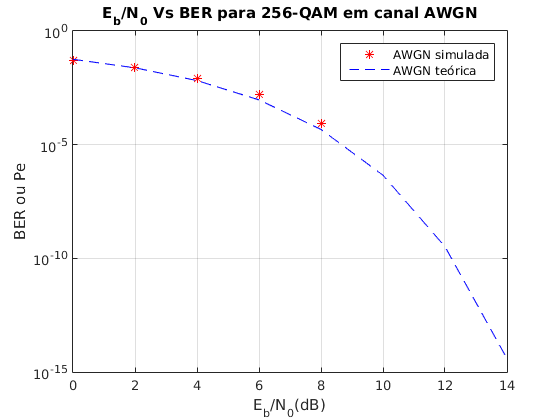

In [5]:
clear all; clc; close all
%% Parâmetros
n_bits = 640000;                % Número de bits
T = 80000;                        % Tempo de símbolo OFDM
Ts = 2;                             % Tempo de símbolo em portadora única
K = T/Ts;                          % Número de subportadoras independentes
N = 2*K;                           % DFT de N pontos
EbN0dB = 0:2:14 ;             % em dB
EbN0=10.^(EbN0dB/10) ;    % linear

%% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1

%% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/16,16);

%% Gerar constelaçao 16-QAM
seq16qam = 8*dataInMatrix(:,1)+dataInMatrix(:,2)+dataInMatrix(:,3)+dataInMatrix(:,4)+dataInMatrix(:,5)+dataInMatrix(:,6)+dataInMatrix(:,7)+dataInMatrix(:,8)+1i*(8*dataInMatrix(:,9)+dataInMatrix(:,10)+dataInMatrix(:,11)+dataInMatrix(:,12)+dataInMatrix(:,13)+dataInMatrix(:,14)+dataInMatrix(:,15)+dataInMatrix(:,16)); 
seq16=seq16qam';
%% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 

%% Construindo xn
xn = sqrt(N)*ifft(X);


%% Loop de variâncias
for ik = 1:length(EbN0dB)
 
    % Adição de ruído
       
    n = 1/sqrt(2)*[(randn(length(xn),1)+j*randn(length(xn),1))] ;
    % Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10^(-EbN0dB(ik)/20) ;
    variance(ik) = 10^(-EbN0dB(ik)/20);
   
  
    % sinal recebido = xn + ruído 
    rn = xn+noise';
    % DFT de rn
    Y= (1/sqrt(N)) *fft(rn);

    %% Plots
% % %     scatterplot(Y)
% % %     hold on
% % %     scatter(real(seq16),imag(seq16), 'r', '+')
% % %     hold off
% % %     title(['Sinal com ruído de variância ', num2str(variance)]);
    %% Demodulação  
    for k= 1:length(Y) % Para percorrer todo o vetor Yk 
        if real(Y(1,k)) > 0 % Para parte real de Yk positiva
            if real(Y(1,k)) > 14
                Z(1,k) = 15;
            else
                if real(Y(1,k)) > 12
                    Z(1,k) = 13;
                else
                    if real(Y(1,k)) > 10
                        Z(1,k) = 11;
                    else
                        if real(Y(1,k)) > 8
                            Z(1,k) = 9;
                        else
                            if real(Y(1,k)) > 6
                                Z(1,k) = 7;
                            else
                                if real(Y(1,k)) > 4
                                    Z(1,k) = 5;
                                else
                                    if real(Y(1,k)) > 2
                                        Z(1,k) = 3;
                                    else
                                        Z(1,k) = 1;
                                    end
                                end
                            end
                        end
                    end
                end               
            end

        else % Para parte real de Yk negativa ou igual a zero
            if real(Y(1,k)) < - 14
                Z(1,k) = -15;
            else
                if real(Y(1,k)) < - 12
                    Z(1,k) = -13;
                else
                    if real(Y(1,k)) < - 10
                        Z(1,k) = -11;
                    else
                        if real(Y(1,k)) < - 8
                            Z(1,k) = -9;
                        else
                            if real(Y(1,k)) < - 6
                                Z(1,k) = -7;
                            else
                                if real(Y(1,k)) < - 4
                                    Z(1,k) = -5;
                                else
                                    if real(Y(1,k)) < - 2
                                        Z(1,k) = -3;
                                    else
                                        Z(1,k) = -1;
                                    end
                                end
                            end
                        end
                    end
                end               
            end              
        end     
        
        
        if imag(Y(1,k)) > 0 % Para parte imaginaria de Yk positiva
            if imag(Y(1,k)) > 14
                Z(1,k) = Z(1,k) + 1i* 15;
            else
                if imag(Y(1,k)) > 12
                    Z(1,k) = Z(1,k) + 1i* 13;
                else
                    if imag(Y(1,k)) > 10
                        Z(1,k) = Z(1,k) + 1i* 11;
                    else
                        if imag(Y(1,k)) > 8
                            Z(1,k) = Z(1,k) + 1i* 9;
                        else
                            if imag(Y(1,k)) > 6
                                Z(1,k) = Z(1,k) + 1i* 7;
                            else
                                if imag(Y(1,k)) > 4
                                    Z(1,k) = Z(1,k) + 1i* 5;
                                else
                                    if imag(Y(1,k)) > 2
                                        Z(1,k) = Z(1,k) + 1i* 3;
                                    else
                                        Z(1,k) = Z(1,k) + 1i* 1;
                                    end
                                end
                            end
                        end
                    end
                end               
            end
                   
            
        else % Para parte imaginaria de Yk negativa ou igual a zero
            if imag(Y(1,k)) < - 14
                Z(1,k) = Z(1,k) - 1i*15;
            else
                if imag(Y(1,k)) < - 12
                    Z(1,k) = Z(1,k) - 1i*13;
                else
                    if imag(Y(1,k)) < - 10
                        Z(1,k) = Z(1,k) - 1i*11;
                    else
                        if imag(Y(1,k)) < - 8
                            Z(1,k) = Z(1,k) - 1i*9;
                        else
                            if imag(Y(1,k)) < - 6
                                Z(1,k) = Z(1,k) - 1i*7;
                            else
                                if imag(Y(1,k)) < - 4
                                    Z(1,k) = Z(1,k) - 1i*5;
                                else
                                    if imag(Y(1,k)) < - 2
                                        Z(1,k) = Z(1,k) - 1i*3;
                                    else
                                        Z(1,k) = Z(1,k) - 1i*1;
                                    end
                                end
                            end
                        end
                    end
                end               
            end              
        end     
    end
   %% Contagem de erro
    error(ik) = length(find(Z(1,2:K)-X(1,2:K)));
    exp = Z(1,2:K);
    disp(['Para variância de ', num2str(variance(ik)), ' houve ', num2str(error(ik)), ' símbolos errados.']);
end
BER_awgn_simulada = error.*8/(3*n_bits);

%% Pe Teórica

% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = (15/32) * erfc(sqrt(24*EbN0/20));

%% Gráficos
figure(1)
% AWGN simulado
semilogy(EbN0dB,BER_awgn_simulada,'r*');
hold on;
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'b--');
hold on;
grid();
%axis([-5 20 10^(-5) 1.2])
title('E_b/N_0 Vs BER para 256-QAM em canal AWGN');
xlabel('E_b/N_0(dB)');
ylabel('BER ou Pe');
legend('AWGN simulada','AWGN teórica');


Percebe-se que para algumas simulações não são encontrados erros nas amostras finais (com maior Eb/No), portanto não são expresas no gráfico.

## Desenvolvimento em Python

### Modulação BPSK

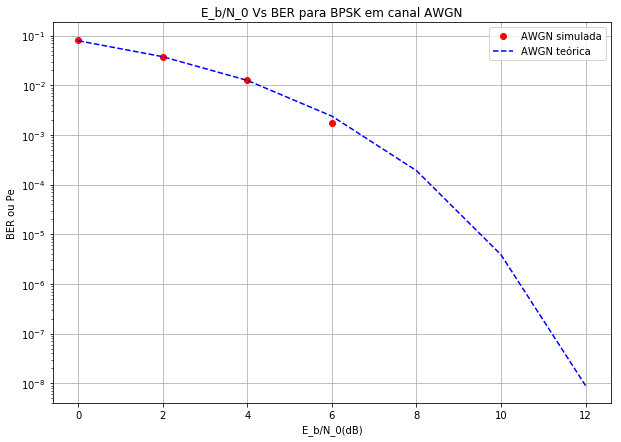

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc

plt.close()
# Parâmetros
n_bits = 10000;                # Número de bits
T = 500;                        # Tempo de símbolo OFDM
Ts = 2;                             # Tempo de símbolo em portadora única
K = T/Ts;                          # Número de subportadoras independentes
N = 2*K;                           # DFT de N pontos
EbN0dB = np.arange(0,14,2) ;             # em dB
EbN0=10**(EbN0dB/10) ;    # linear

# Gerar bits aleatórios
dataIn=np.random.randn(n_bits)> 0.5;   # Sequência de números entre 0 e 1 uniformemente distribuídos
X =2*dataIn -1 ;  # Sequência de -1 e 1

## Construindo xn
xn = np.sqrt(N)*np.fft.ifft(X);

## Loop de variâncias
variance = np.zeros(len(EbN0dB))
contador_de_erro = np.zeros(len(EbN0dB));
BER_awgn_simulada = np.zeros(len(EbN0dB));
for ik in range(len(EbN0dB)):
# Adição de ruído
    n = 1/np.sqrt(2)*(np.random.randn(len(xn))+1j*np.random.randn(len(xn))) 
# Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10**(-EbN0dB[ik]/20)  
    variance[ik] = 10**(-EbN0dB[ik]/20);
    # sinal recebido = xn + ruído 
    r = X + np.transpose(noise);
    rn = xn+np.transpose(noise);
    # DFT de rn
    Y= (1/np.sqrt(N)) *np.fft.fft(rn);
       
    r_awgn = r.real > 0 ;
    BER_awgn_simulada[ik] = np.sum(np.bitwise_xor(dataIn,r_awgn));

#Fim do primeiro For 

BER_awgn_simulada = BER_awgn_simulada/(n_bits);

## Pe Teórica

## Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5 * erfc(np.sqrt(EbN0)); #segundo formulação encontrada na literatura

## Gráficos

plt.figure(7,[10,7])
## AWGN simulado
plt.semilogy(EbN0dB,BER_awgn_simulada,'ro',label='AWGN simulada')

## AWGN teórico
plt.semilogy(EbN0dB,BER_awgn_teorica,'b--',label='AWGN teórica')
plt.grid()

plt.legend()
plt.title("E_b/N_0 Vs BER para BPSK em canal AWGN")
plt.xlabel('E_b/N_0(dB)')
plt.ylabel('BER ou Pe')
plt.show()

### Modulação 64-QAM

Sinal com ruído de variância 1.0 teve 6478.0 símbolos errados
Sinal com ruído de variância 0.794328234724 teve 3175.0 símbolos errados
Sinal com ruído de variância 0.63095734448 teve 1115.0 símbolos errados
Sinal com ruído de variância 0.501187233627 teve 236.0 símbolos errados
Sinal com ruído de variância 0.398107170553 teve 9.0 símbolos errados
Sinal com ruído de variância 0.316227766017 teve 0.0 símbolos errados
Sinal com ruído de variância 0.251188643151 teve 0.0 símbolos errados


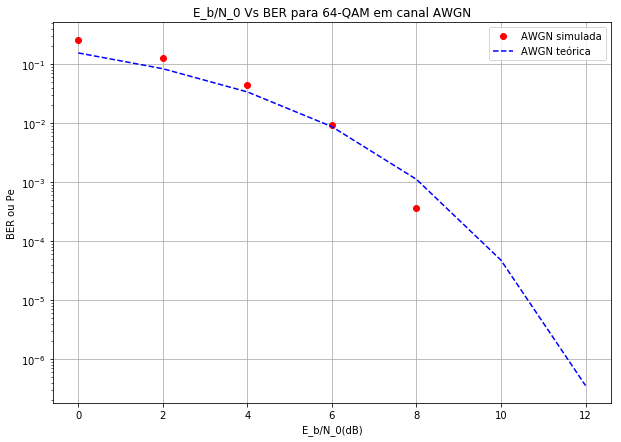

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc

plt.close()
# Parâmetros
n_bits = 100000;                # Número de bits
T = 25000;                        # Tempo de símbolo OFDM
Ts = 2;                             # Tempo de símbolo em portadora única
K = T/Ts;                          # Número de subportadoras independentes
N = 2*K;                           # DFT de N pontos
EbN0dB = np.arange(0,14,2) ;             # em dB
EbN0=10**(EbN0dB/10) ;    # linear

# Gerar bits aleatórios
dataIn=np.random.randn(n_bits)> 0.5;   # Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=2*dataIn -1 ;  # Sequência de -1 e 1
# Conversor serial paralelo
dataInMatrix = np.reshape(dataIn,(int(n_bits/8),8))

# Gerar constelaçao 64-QAM
mat = np.array([[1j, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0]])
for l in range(0,8):
    for c in range(0,8):
        mat[c][l] = (-7+2*l) + 1j*(7-2*c);

seq256qam = 4*dataInMatrix[:,0] + dataInMatrix[:,1] + dataInMatrix[:,2] + dataInMatrix[:,3] + 1j*(4*dataInMatrix[:,4] + dataInMatrix[:,5] + dataInMatrix[:,6] + dataInMatrix[:,7]) 
seq256=np.transpose(seq256qam)
## Garantir propriedadade da simetria
#inverter = np.flip(seq256,0)
X = np.concatenate((seq256 ,np.flip(seq256,0)))

## Construindo xn
xn = np.sqrt(N)*np.fft.ifft(X);

## Loop de variâncias
variance = np.zeros(len(EbN0dB))
contador_de_erro = np.zeros(len(EbN0dB));
for ik in range(len(EbN0dB)):
# Adição de ruído
    n = 1/np.sqrt(2)*(np.random.randn(len(xn))+1j*np.random.randn(len(xn))) 
# Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10**(-EbN0dB[ik]/20)  
    variance[ik] = 10**(-EbN0dB[ik]/20);
    # sinal recebido = xn + ruído 
    rn = xn+np.transpose(noise);
    # DFT de rn
    Y= (1/np.sqrt(N)) *np.fft.fft(rn);
#### Plots
#    plt.figure(ik,[10,7])
#    plt.plot(Y.real,Y.imag,'b.')
#    #plt.plot(mat.real,mat.imag,'r+')
#    plt.plot(seq256.real,seq256.imag,'r+')
#    plt.title('Sinal com ruído de variância ' + str(variance[ik])) 


    # Demodulação 
    Z = np.zeros(len(Y))+1j*np.zeros(len(Y))
    for k in range(len(Y)):  # Para percorrer todo o vetor Yk 
        if np.real(Y[k]) > 0: # Para parte real de Yk positiva
           
                            if np.real(Y[k]) > 6:
                                Z[k] = 7;
                            else:
                                if np.real(Y[k]) > 4:
                                    Z[k] = 5;
                                else:
                                    if np.real(Y[k]) > 2:
                                        Z[k] = 3;
                                    else:
                                        Z[k] = 1;
              
        else: # Para parte real de Yk negativa ou igual a zero
           
                            if np.real(Y[k]) < - 6:
                                Z[k] = -7;
                            else:
                                if np.real(Y[k]) < - 4:
                                    Z[k] = -5;
                                else:
                                    if np.real(Y[k]) < - 2:
                                        Z[k] = -3;
                                    else:
                                        Z[k] = -1;
           
        
        if np.imag(Y[k]) > 0: # Para parte imaginaria de Yk positiva
           
                            if np.imag(Y[k]) > 6:
                                Z[k] = Z[k] + 1j* 7;
                            else:
                                if np.imag(Y[k]) > 4:
                                    Z[k] = Z[k] + 1j* 5;
                                else:
                                    if np.imag(Y[k]) > 2:
                                        Z[k] = Z[k] + 1j* 3;
                                    else:
                                        Z[k] = Z[k] + 1j* 1;
                  
            
        else: # Para parte imaginaria de Yk negativa ou igual a zero
           
                            if np.imag(Y[k]) < - 6:
                                Z[k] = Z[k] - 1j*7;
                            else:
                                if np.imag(Y[k]) < - 4:
                                    Z[k] = Z[k] - 1j*5;
                                else:
                                    if np.imag(Y[k]) < - 2:
                                        Z[k] = Z[k] - 1j*3;
                                    else:
                                        Z[k] = Z[k] - 1j*1;
        
## Contagem de erro
        if Z[k]-X[k] != 0:
            contador_de_erro[ik] = contador_de_erro[ik] + 1
        #Fim do segundo For
#Fim do primeiro For 
for ik in range(len(EbN0dB)):
    print('Sinal com ruído de variância '  + str(variance[ik])+ ' teve '+ str(contador_de_erro[ik])+ ' símbolos errados')
BER_awgn_simulada = contador_de_erro*4/(n_bits);

## Pe Teórica

## Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.75 * erfc(np.sqrt(0.8*EbN0)); #segundo formulação encontrada na literatura

## Gráficos

plt.figure(7,[10,7])
## AWGN simulado
plt.semilogy(EbN0dB,BER_awgn_simulada,'ro',label='AWGN simulada')

## AWGN teórico
plt.semilogy(EbN0dB,BER_awgn_teorica,'b--',label='AWGN teórica')
plt.grid()

plt.legend()
plt.title("E_b/N_0 Vs BER para 64-QAM em canal AWGN")
plt.xlabel('E_b/N_0(dB)')
plt.ylabel('BER ou Pe')
plt.show()

Aqui temos uma maior imprecisão decorrida do fato de uma estimação da quantidade de bit's errados por símbolo.

### Modulação 256-QAM

Sinal com ruído de variância 1.0 teve 22583.0 símbolos errados
Sinal com ruído de variância 0.794328234724 teve 11210.0 símbolos errados
Sinal com ruído de variância 0.63095734448 teve 3853.0 símbolos errados
Sinal com ruído de variância 0.501187233627 teve 743.0 símbolos errados
Sinal com ruído de variância 0.398107170553 teve 62.0 símbolos errados
Sinal com ruído de variância 0.316227766017 teve 3.0 símbolos errados
Sinal com ruído de variância 0.251188643151 teve 0.0 símbolos errados


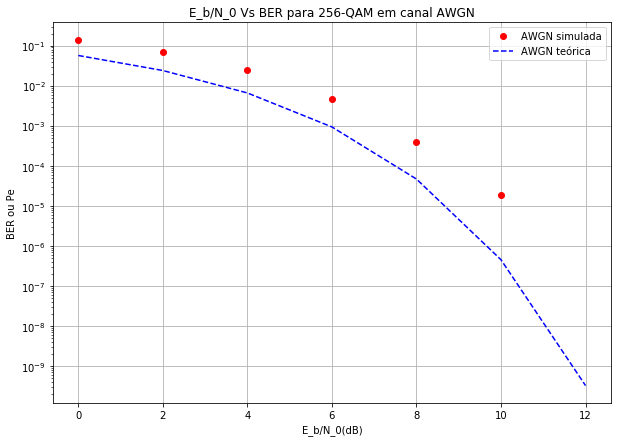

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc

plt.close()
# Parâmetros
n_bits = 640000;                # Número de bits
T = 80000;                        # Tempo de símbolo OFDM
Ts = 2;                             # Tempo de símbolo em portadora única
K = T/Ts;                          # Número de subportadoras independentes
N = 2*K;                           # DFT de N pontos
EbN0dB = np.arange(0,14,2) ;             # em dB
EbN0=10**(EbN0dB/10) ;    # linear

# Gerar bits aleatórios
dataIn=np.random.randn(n_bits)> 0.5;   # Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=2*dataIn -1 ;  # Sequência de -1 e 1
# Conversor serial paralelo
dataInMatrix = np.reshape(dataIn,(int(n_bits/16),16))

# Gerar constelaçao 256-QAM
mat = np.array([[1j, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
for l in range(0,16):
    for c in range(0,16):
        mat[c][l] = (-15+2*l) + 1j*(15-2*c);

seq256qam = 8*dataInMatrix[:,0] + dataInMatrix[:,1] + dataInMatrix[:,2] + dataInMatrix[:,3] + dataInMatrix[:,4] + dataInMatrix[:,5] + dataInMatrix[:,6] + dataInMatrix[:,7]+1j*(8*dataInMatrix[:,8]+dataInMatrix[:,9]+dataInMatrix[:,10]+dataInMatrix[:,11]+dataInMatrix[:,12]+dataInMatrix[:,13]+dataInMatrix[:,14]+dataInMatrix[:,15]) 
seq256=np.transpose(seq256qam)
## Garantir propriedadade da simetria
#virou = np.flip(seq256,0)
X = np.concatenate((seq256 ,np.flip(seq256,0)))

## Construindo xn
xn = np.sqrt(N)*np.fft.ifft(X);

## Loop de variâncias
variance = np.zeros(len(EbN0dB))
contador_de_erro = np.zeros(len(EbN0dB));
for ik in range(len(EbN0dB)):
# Adição de ruído
    n = 1/np.sqrt(2)*(np.random.randn(len(xn))+1j*np.random.randn(len(xn))) 
# Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10**(-EbN0dB[ik]/20)  
    variance[ik] = 10**(-EbN0dB[ik]/20);
    # sinal recebido = xn + ruído 
    rn = xn+np.transpose(noise);
    # DFT de rn
    Y= (1/np.sqrt(N)) *np.fft.fft(rn);
    #Vetor = np.reshape(Y,(int(n_bits),1))
##### Plots
#    plt.figure(ik,[10,7])
#    plt.plot(Y.real,Y.imag,'b.')
#    plt.plot(mat.real,mat.imag,'r+')
##    plt.plot(seq256.real,seq256.imag,'r+')
#    plt.title('Sinal com ruído de variância ' + str(variance[ik]))
#    print('Sinal com ruído de variância ',  variance[ik])

    # Demodulação 
    Z = np.zeros(len(Y))+1j*np.zeros(len(Y))
    for k in range(len(Y)):  # Para percorrer todo o vetor Yk 
        if np.real(Y[k]) > 0: # Para parte real de Yk positiva
            if np.real(Y[k]) > 14:
              Z[k] = 15;
            else:
                if np.real(Y[k]) > 12:
                    Z[k] = 13;
                else:
                    if np.real(Y[k]) > 10:
                        Z[k] = 11;
                    else:
                        if np.real(Y[k]) > 8:
                            Z[k] = 9;
                        else:
                            if np.real(Y[k]) > 6:
                                Z[k] = 7;
                            else:
                                if np.real(Y[k]) > 4:
                                    Z[k] = 5;
                                else:
                                    if np.real(Y[k]) > 2:
                                        Z[k] = 3;
                                    else:
                                        Z[k] = 1;
              
        else: # Para parte real de Yk negativa ou igual a zero
            if np.real(Y[k]) < - 14:
                Z[k] = -15;
            else:
                if np.real(Y[k]) < - 12:
                    Z[k] = -13;
                else:
                    if np.real(Y[k]) < - 10:
                        Z[k] = -11;
                    else:
                        if np.real(Y[k]) < - 8:
                            Z[k] = -9;
                        else:
                            if np.real(Y[k]) < - 6:
                                Z[k] = -7;
                            else:
                                if np.real(Y[k]) < - 4:
                                    Z[k] = -5;
                                else:
                                    if np.real(Y[k]) < - 2:
                                        Z[k] = -3;
                                    else:
                                        Z[k] = -1;
           
        
        if np.imag(Y[k]) > 0: # Para parte imaginaria de Yk positiva
            if np.imag(Y[k]) > 14:
                Z[k] = Z[k] + 1j* 15;
            else:
                if np.imag(Y[k]) > 12:
                    Z[k] = Z[k] + 1j* 13;
                else:
                    if np.imag(Y[k]) > 10:
                        Z[k] = Z[k] + 1j* 11;
                    else:
                        if np.imag(Y[k]) > 8:
                            Z[k] = Z[k] + 1j* 9;
                        else:
                            if np.imag(Y[k]) > 6:
                                Z[k] = Z[k] + 1j* 7;
                            else:
                                if np.imag(Y[k]) > 4:
                                    Z[k] = Z[k] + 1j* 5;
                                else:
                                    if np.imag(Y[k]) > 2:
                                        Z[k] = Z[k] + 1j* 3;
                                    else:
                                        Z[k] = Z[k] + 1j* 1;
                  
            
        else: # Para parte imaginaria de Yk negativa ou igual a zero
            if np.imag(Y[k]) < - 14:
                Z[k] = Z[k] - 1j*15;
            else:
                if np.imag(Y[k]) < - 12:
                    Z[k] = Z[k] - 1j*13;
                else:
                    if np.imag(Y[k]) < - 10:
                        Z[k] = Z[k] - 1j*11;
                    else:
                        if np.imag(Y[k]) < - 8:
                            Z[k] = Z[k] - 1j*9;
                        else:
                            if np.imag(Y[k]) < - 6:
                                Z[k] = Z[k] - 1j*7;
                            else:
                                if np.imag(Y[k]) < - 4:
                                    Z[k] = Z[k] - 1j*5;
                                else:
                                    if np.imag(Y[k]) < - 2:
                                        Z[k] = Z[k] - 1j*3;
                                    else:
                                        Z[k] = Z[k] - 1j*1;
        
## Contagem de erro
        if Z[k]-X[k] != 0:
            contador_de_erro[ik] = contador_de_erro[ik] + 1
        #Fim do segundo For
#Fim do primeiro For 

BER_awgn_simulada = contador_de_erro*8/n_bits;
for ik in range(len(EbN0dB)):
    print('Sinal com ruído de variância '  + str(variance[ik])+ ' teve '+ str(contador_de_erro[ik])+ ' símbolos errados')
BER_awgn_simulada = contador_de_erro*4/(n_bits);
## Pe Teórica

## Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 15/32 * erfc(np.sqrt(24*EbN0/20));  #segundo formulação encontrada na literatura

## Gráficos

plt.figure(7,[10,7])
## AWGN simulado
plt.semilogy(EbN0dB,BER_awgn_simulada,'ro',label='AWGN simulada')

## AWGN teórico
plt.semilogy(EbN0dB,BER_awgn_teorica,'b--',label='AWGN teórica')
plt.grid()

plt.legend()
plt.title("E_b/N_0 Vs BER para 256-QAM em canal AWGN")
plt.xlabel('E_b/N_0(dB)')
plt.ylabel('BER ou Pe')
plt.show()

## Visualização Prática: 
Para que se tivesse uma resposta mais visual sobre como andava o resultado do loopback (ao menos para as modulações 64-QAM e 256-QAM, visto que a modulação BPSK já foi descrita no *hands-on 8*), foi implementado um saída com esse plots, também em MatLab e Python.

#### Python 256-QAM
Resultados da pior Eb/No (maior variância) para o melhor Eb/No (menor variância).

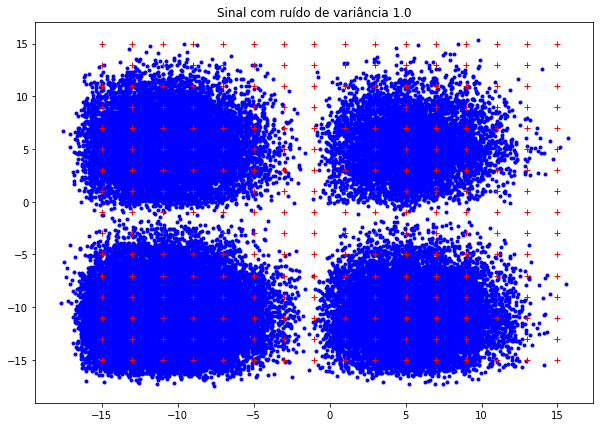

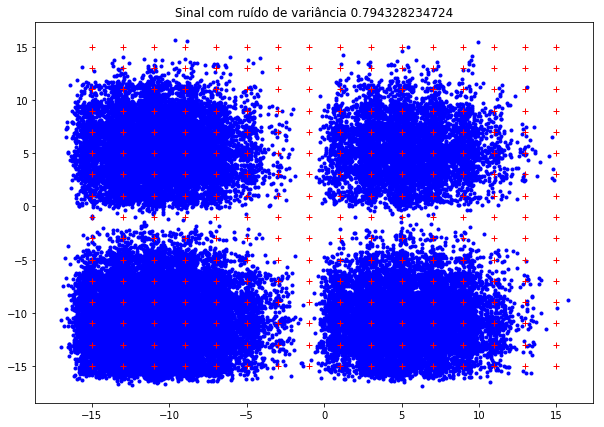

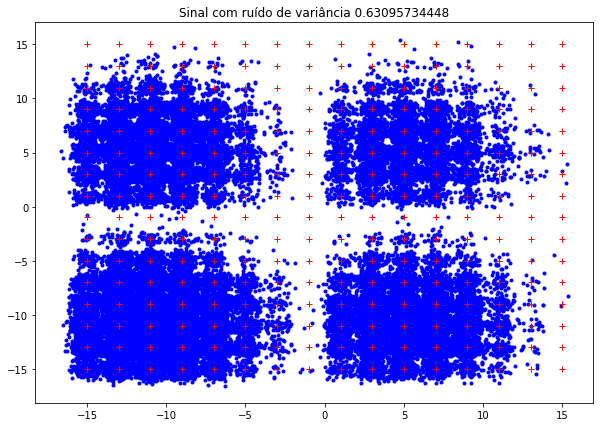

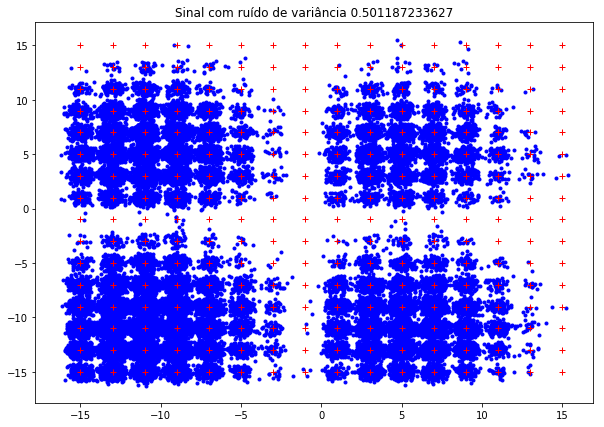

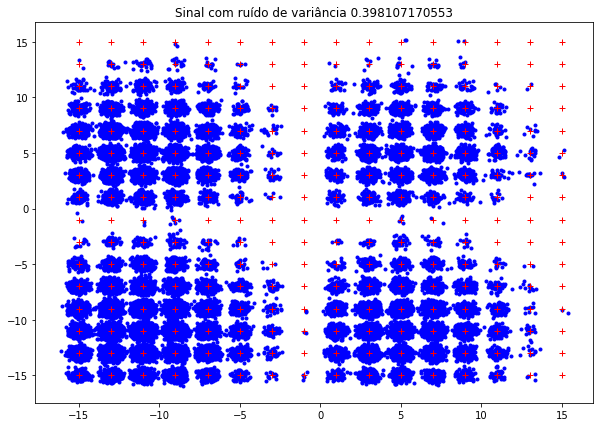

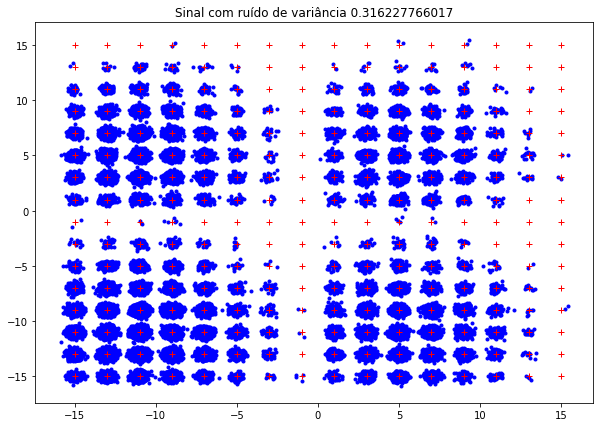

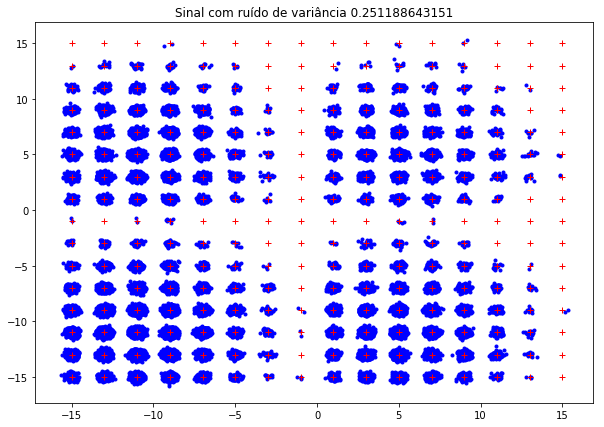

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc

plt.close()
# Parâmetros
n_bits = 640000;                # Número de bits
T = 80000;                        # Tempo de símbolo OFDM
Ts = 2;                             # Tempo de símbolo em portadora única
K = T/Ts;                          # Número de subportadoras independentes
N = 2*K;                           # DFT de N pontos
EbN0dB = np.arange(0,14,2) ;             # em dB
EbN0=10**(EbN0dB/10) ;    # linear

# Gerar bits aleatórios
dataIn=np.random.randn(n_bits)> 0.5;   # Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=2*dataIn -1 ;  # Sequência de -1 e 1
# Conversor serial paralelo
dataInMatrix = np.reshape(dataIn,(int(n_bits/16),16))

# Gerar constelaçao 256-QAM
mat = np.array([[1j, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
for l in range(0,16):
    for c in range(0,16):
        mat[c][l] = (-15+2*l) + 1j*(15-2*c);

seq256qam = 8*dataInMatrix[:,0] + dataInMatrix[:,1] + dataInMatrix[:,2] + dataInMatrix[:,3] + dataInMatrix[:,4] + dataInMatrix[:,5] + dataInMatrix[:,6] + dataInMatrix[:,7]+1j*(8*dataInMatrix[:,8]+dataInMatrix[:,9]+dataInMatrix[:,10]+dataInMatrix[:,11]+dataInMatrix[:,12]+dataInMatrix[:,13]+dataInMatrix[:,14]+dataInMatrix[:,15]) 
seq256=np.transpose(seq256qam)
## Garantir propriedadade da simetria
#virou = np.flip(seq256,0)
X = np.concatenate((seq256 ,np.flip(seq256,0)))

## Construindo xn
xn = np.sqrt(N)*np.fft.ifft(X);

## Loop de variâncias
variance = np.zeros(len(EbN0dB))
contador_de_erro = np.zeros(len(EbN0dB));
for ik in range(len(EbN0dB)):
# Adição de ruído
    n = 1/np.sqrt(2)*(np.random.randn(len(xn))+1j*np.random.randn(len(xn))) 
# Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10**(-EbN0dB[ik]/20)  
    variance[ik] = 10**(-EbN0dB[ik]/20);
    # sinal recebido = xn + ruído 
    rn = xn+np.transpose(noise);
    # DFT de rn
    Y= (1/np.sqrt(N)) *np.fft.fft(rn);
    #Vetor = np.reshape(Y,(int(n_bits),1))
##### Plots
    plt.figure(ik,[10,7])
    plt.plot(Y.real,Y.imag,'b.')
    plt.plot(mat.real,mat.imag,'r+')
#    plt.plot(seq256.real,seq256.imag,'r+')
    plt.title('Sinal com ruído de variância ' + str(variance[ik]))

#### Python 64-QAM
Resultados da pior Eb/No (maior variância) para o melhor Eb/No (menor variância)

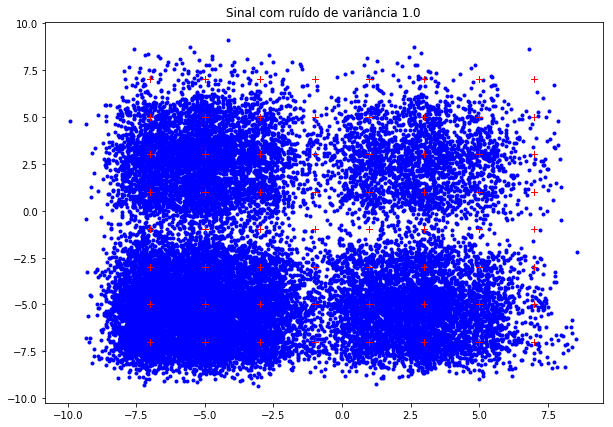

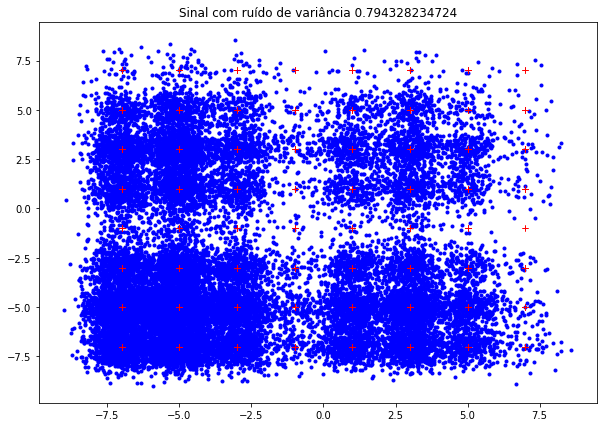

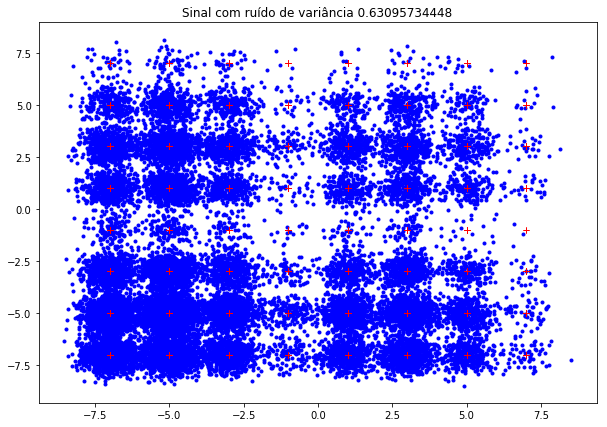

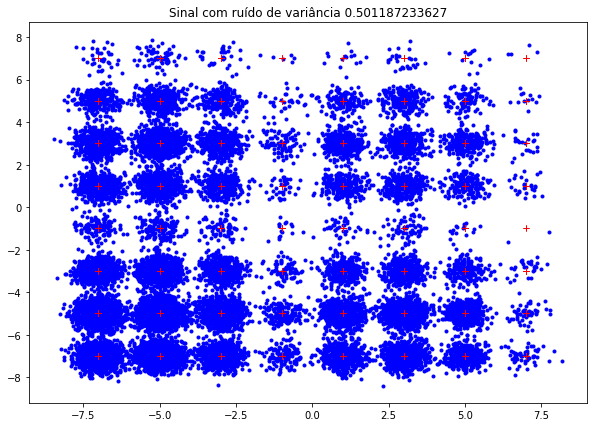

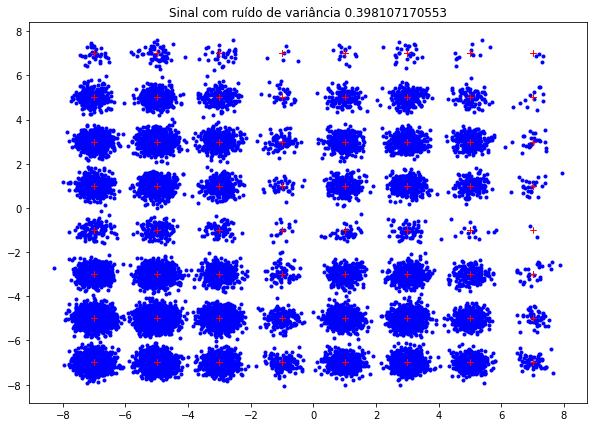

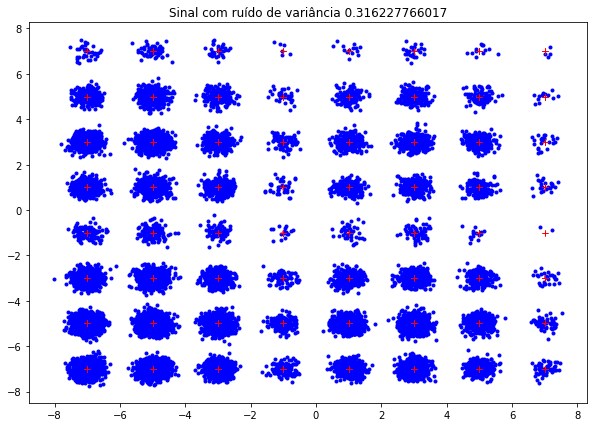

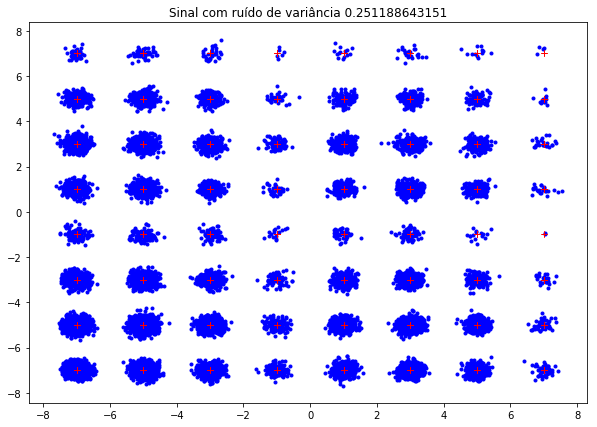

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc

plt.close()
# Parâmetros
n_bits = 100000;                # Número de bits
T = 25000;                        # Tempo de símbolo OFDM
Ts = 2;                             # Tempo de símbolo em portadora única
K = T/Ts;                          # Número de subportadoras independentes
N = 2*K;                           # DFT de N pontos
EbN0dB = np.arange(0,14,2) ;             # em dB
EbN0=10**(EbN0dB/10) ;    # linear

# Gerar bits aleatórios
dataIn=np.random.randn(n_bits)> 0.5;   # Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=2*dataIn -1 ;  # Sequência de -1 e 1
# Conversor serial paralelo
dataInMatrix = np.reshape(dataIn,(int(n_bits/8),8))

# Gerar constelaçao 64-QAM
mat = np.array([[1j, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0]])
for l in range(0,8):
    for c in range(0,8):
        mat[c][l] = (-7+2*l) + 1j*(7-2*c);

seq256qam = 4*dataInMatrix[:,0] + dataInMatrix[:,1] + dataInMatrix[:,2] + dataInMatrix[:,3] + 1j*(4*dataInMatrix[:,4] + dataInMatrix[:,5] + dataInMatrix[:,6] + dataInMatrix[:,7]) 
seq256=np.transpose(seq256qam)
## Garantir propriedadade da simetria
#inverter = np.flip(seq256,0)
X = np.concatenate((seq256 ,np.flip(seq256,0)))

## Construindo xn
xn = np.sqrt(N)*np.fft.ifft(X);

## Loop de variâncias
variance = np.zeros(len(EbN0dB))
contador_de_erro = np.zeros(len(EbN0dB));
for ik in range(len(EbN0dB)):
# Adição de ruído
    n = 1/np.sqrt(2)*(np.random.randn(len(xn))+1j*np.random.randn(len(xn))) 
# Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10**(-EbN0dB[ik]/20)  
    variance[ik] = 10**(-EbN0dB[ik]/20);
    # sinal recebido = xn + ruído 
    rn = xn+np.transpose(noise);
    # DFT de rn
    Y= (1/np.sqrt(N)) *np.fft.fft(rn);
#### Plots
    plt.figure(ik,[10,7])
    plt.plot(Y.real,Y.imag,'b.')
    plt.plot(mat.real,mat.imag,'r+')
    plt.plot(seq256.real,seq256.imag,'r+')
    plt.title('Sinal com ruído de variância ' + str(variance[ik])) 

#### MatLab 256-QAM
Resultados da pior Eb/No (maior variância) para o melhor Eb/No (menor variância).

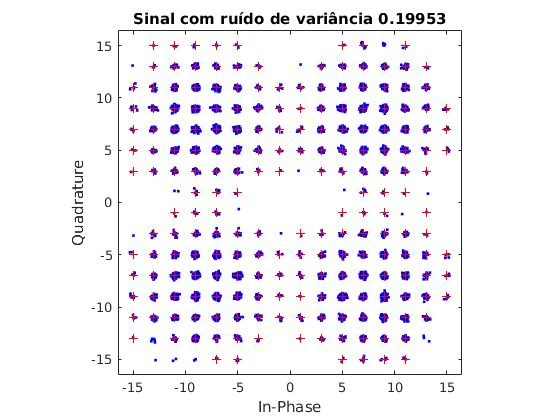

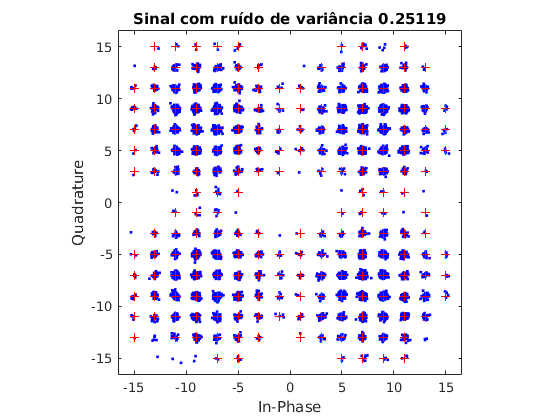

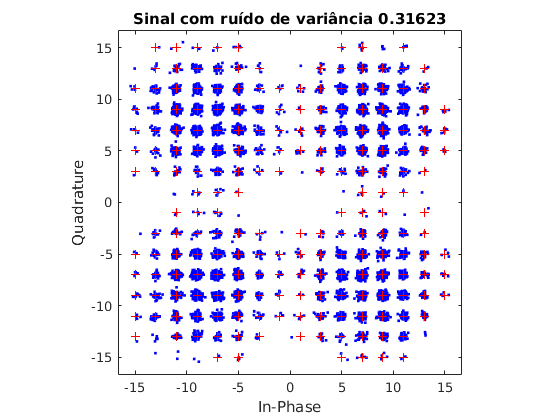

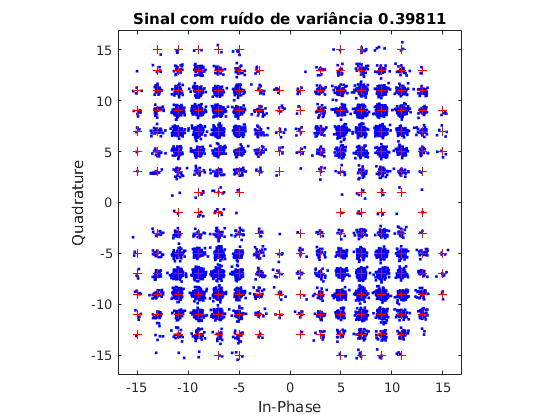

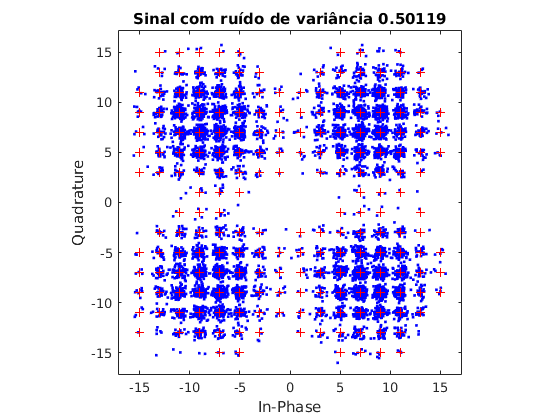

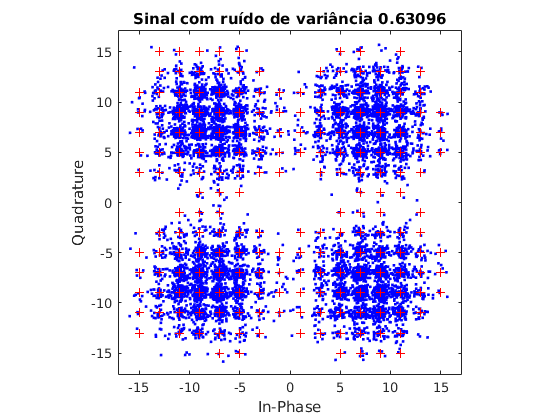

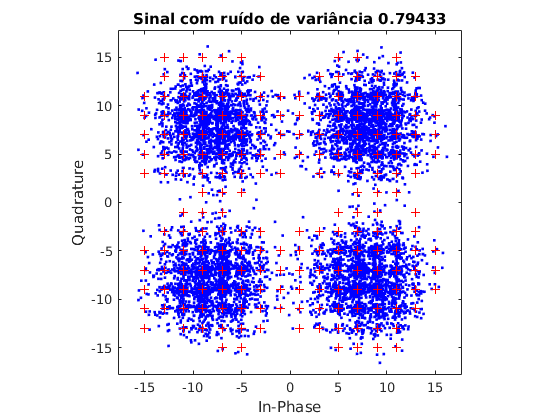

In [4]:
clear all; clc; close all
%% Parâmetros
n_bits = 64000;                % Número de bits
T = 8000;                        % Tempo de símbolo OFDM
Ts = 2;                             % Tempo de símbolo em portadora única
K = T/Ts;                          % Número de subportadoras independentes
N = 2*K;                           % DFT de N pontos
EbN0dB = 0:2:14 ;             % em dB
EbN0=10.^(EbN0dB/10) ;    % linear

%% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1

%% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/16,16);

%% Gerar constelaçao 16-QAM
seq16qam = 8*dataInMatrix(:,1)+dataInMatrix(:,2)+dataInMatrix(:,3)+dataInMatrix(:,4)+dataInMatrix(:,5)+dataInMatrix(:,6)+dataInMatrix(:,7)+dataInMatrix(:,8)+1i*(8*dataInMatrix(:,9)+dataInMatrix(:,10)+dataInMatrix(:,11)+dataInMatrix(:,12)+dataInMatrix(:,13)+dataInMatrix(:,14)+dataInMatrix(:,15)+dataInMatrix(:,16)); 
seq16=seq16qam';
%% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 

%% Construindo xn
xn = sqrt(N)*ifft(X);


%% Loop de variâncias

for ik = 1:length(EbN0dB)
 
    % Adição de ruído
       
    n = 1/sqrt(2)*[(randn(length(xn),1)+j*randn(length(xn),1))] ;
    % Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10^(-EbN0dB(ik)/20) ;
    variance(ik) = 10^(-EbN0dB(ik)/20);
   
  
    % sinal recebido = xn + ruído 
    rn = xn+noise';
    % DFT de rn
    Y= (1/sqrt(N)) *fft(rn);

    %% Plots
    scatterplot(Y)
    hold on
    scatter(real(seq16),imag(seq16), 'r', '+')
    hold off
    title(['Sinal com ruído de variância ', num2str(variance(ik))]);
end

#### MatLab 64-QAM
Resultados da pior Eb/No (maior variância) para o melhor Eb/No (menor variância).

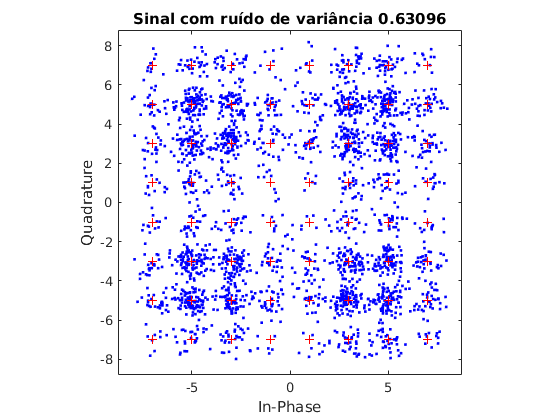

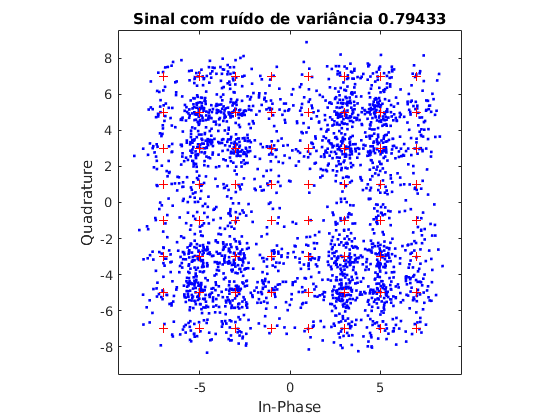

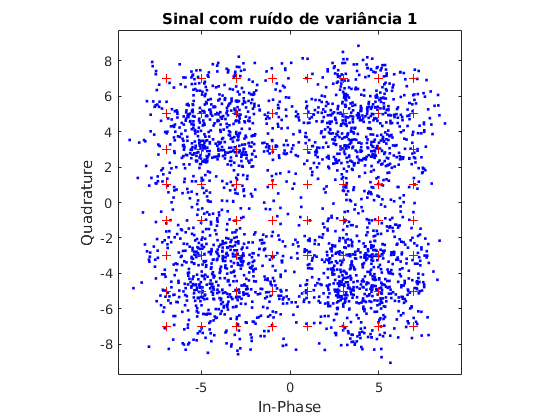

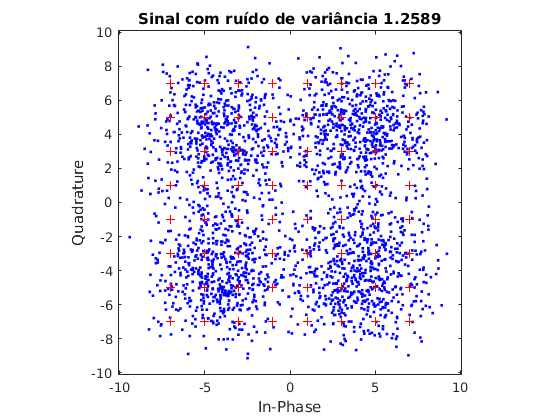

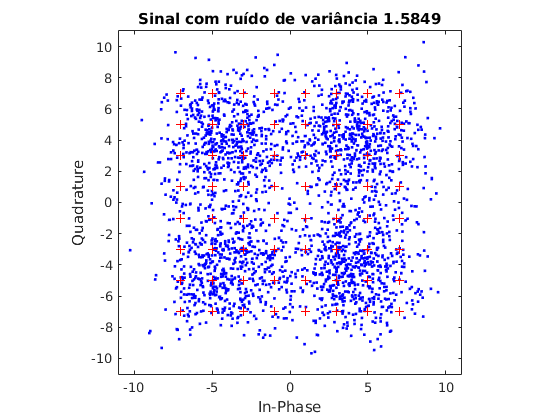

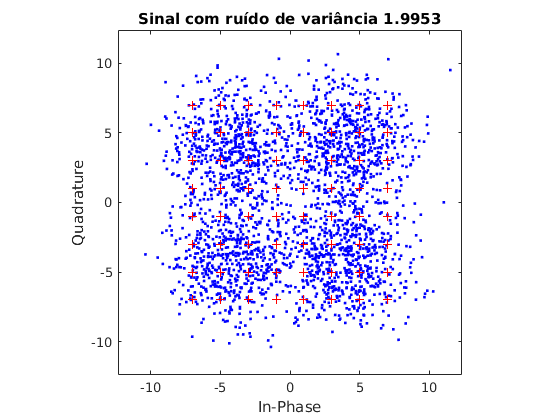

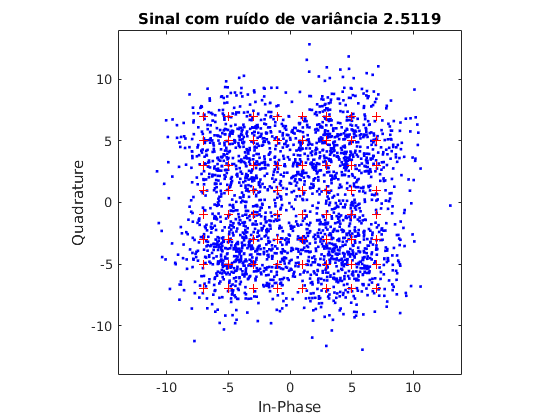

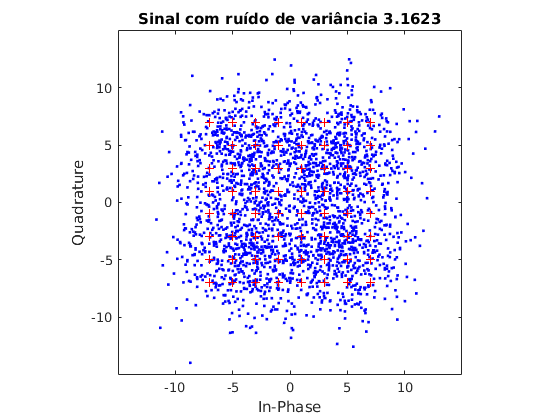

In [5]:
clear all; clc; close all
% Parâmetros
n_bits = 10000;                % Número de bits
T = 2500;                        % Tempo de símbolo OFDM
Ts = 2;                        % Tempo de símbolo em portadora única
K = T/Ts;                     % Número de subportadoras independentes
N = 2*K;                      % DFT de N pontos

EbN0dB = -10:2:4 ;             % em dB
EbN0=10.^(EbN0dB/10) ;    % linear

% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/8,8);

% Gerar constelaçao 16-QAM
seq16qam = 4*dataInMatrix(:,1)+dataInMatrix(:,2)+dataInMatrix(:,3)+dataInMatrix(:,4)+1i*(4*dataInMatrix(:,5)+dataInMatrix(:,6)+dataInMatrix(:,7)+dataInMatrix(:,8)); 
seq16=seq16qam';
% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 
%
% Construindo xn
xn = sqrt(N)*ifft(X);


% Loop de variâncias
for ik = 1:length(EbN0dB)
    
    n = 1/sqrt(2)*[(randn(length(xn),1)+j*randn(length(xn),1))] ;
    % Vetor de ruído com potência proporcional a EbNo corrente    
    noise = n*10^(-EbN0dB(ik)/20) ;
    variance(ik) = 10^(-EbN0dB(ik)/20);
    
    % sinal recebido = xn + ruído 
    rn = xn+noise';
    % DFT de rn
    Y= (1/sqrt(N)) *fft(rn);
    %
    % Plots
     scatterplot(Y)
     hold on
     scatter(real(seq16),imag(seq16), 'r', '+')
     hold off
     title(['Sinal com ruído de variância ', num2str(variance(ik))]);
end

# Prática 10
Por fim, por desencargo de consciência e comprovação do esforço é apresentado a prática que não foi finalizada no prazo, porém, não sem tentativas e trabalho. 

 ### Parte 1 de 4

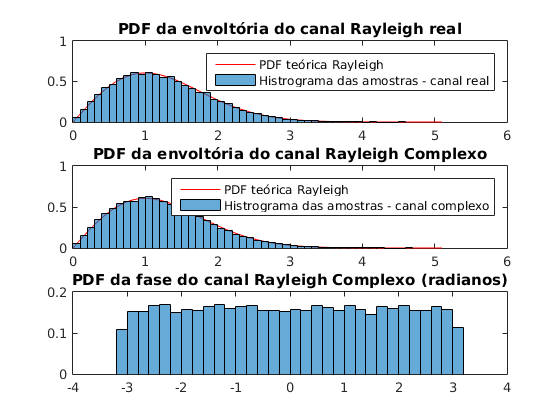

In [6]:
clear all; close all;
%% Parâmetros
N = 20000;                                  %% Número de amostras
ts = 0.1;
x=0:ts:5+ts;                       %% Eixo x
sigma = 1;                                  %% Parâmetro Rayleigh
u = rand(N,1);                      %% Amostras aleatórias uniformemente distribuídas de 0 a 1

%% Canal Rayleigh real via método da inversão
rReal = sigma*sqrt(-2*log(u));        %% Rayleigh via método da inversão

%% PDF Rayleigh teórico 
pdfTeo = x/(sigma^2).*exp(-((x/sigma).^2)/2);
 
%% Canal Rayleigh complexo via VAs Gaussianas independentes
rComplexo = randn(N,1)+randn(N,1)*i;

%% Gráficos
figure(1)
subplot(3,1,1)
%% PDF teórica e Histograma do Canal real 
plot(x,pdfTeo,'r');
hold on;
histogram(rReal,'Normalization','pdf');
title('PDF da envoltória do canal Rayleigh real')
legend('PDF teórica Rayleigh','Histrograma das amostras - canal real')

%% Envoltória do Canal complexo e Histograma da envoltória do canal complexo 
subplot(3,1,2)
plot(x,pdfTeo,'r');
hold on;
histogram(abs(rComplexo),'Normalization','pdf');
title('PDF da envoltória do canal Rayleigh Complexo')
legend('PDF teórica Rayleigh','Histrograma das amostras - canal complexo')

%% Histrograma da Fase do Canal complexo
subplot(3,1,3)
histogram(angle(rComplexo),'Normalization','pdf');
title('PDF da fase do canal Rayleigh Complexo (radianos)')

### Parte 2 de 4

> In legendHGUsingMATLABClasses>set_children_and_strings (line 650)
  In legendHGUsingMATLABClasses>make_legend (line 313)
  In legendHGUsingMATLABClasses (line 241)
  In legend (line 118) 
> In legendHGUsingMATLABClasses>set_children_and_strings (line 650)
  In legendHGUsingMATLABClasses>make_legend (line 313)
  In legendHGUsingMATLABClasses (line 241)
  In legend (line 118) 


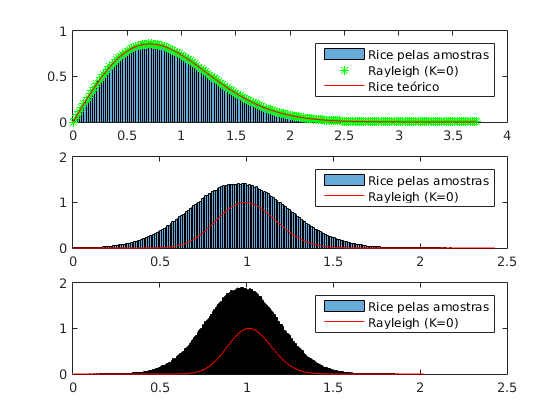

In [7]:
clear all;close all;
%%Parâmetros
N = 1e6;                         %%Número de amostras a gerar
vtK = [0,5,10];                  %%Fatores K Ricianos a simular
totPower=1;                      %%Total power of LOS path & scattered paths

%%Loop nos valores de K
for ik = 1:length(vtK)
    K = vtK(ik);
    subplot(length(vtK),1,ik)
    s=sqrt(K/(K+1)*totPower);                %%Parâmetro de não centralidade
    sigma=totPower/sqrt(2*(K+1));
    %%Amostras do Canal Rice
    X = s + sigma*randn(N,1);                %%LOS: VA Gaussina com média=s e sigma definido
    Y = 0 + sigma*randn(N,1);                %%NLOS: VA Gaussina com média=0 e sigma definido
    Z = X + 1i*Y;
    h=histogram(abs(Z),'Normalization','pdf');
    hold on;
    w=h.BinWidth;
    r=h.BinEdges;
    if K==0
        rayleigh_pdf = r./(sigma^2).*exp(-r.^2/(2*sigma^2));
       plot(r,rayleigh_pdf,'g*')
       hold on;
    A = 2.*r.*(K+1)/totPower; 
    B = exp(-K -r.^2 * (K+1)/totPower);
    C = 2.*r.*sqrt(K*(K+1)/totPower);
    D = besselj(K,C);
    fRice = A.*B.*D;
    plot(r,fRice,'r'); 
    %legend('Rice pelas amostras', 'Rayleigh (K=0)','Rice teórico')
    else
    A = 2.*r.*(K+1)/totPower; 
    B = exp(-K -r.^2 * (K+1)/totPower);
    C = besselj(3*K,2.*r.*sqrt(K*(K+1)/totPower));% '3*K'->Gambiarra p/ tentar deixar o código 
    fRice = A.*B.*C;                              %  com plots + satisfatórios...
    fRice = fRice/max(fRice);                     % Normalização -> Gambiarra para tentar 
    plot(r,fRice,'r');                            % deixar o código com plots mais satisfatórios...
    end
     legend('Rice pelas amostras', 'Rayleigh (K=0)','Rice teórico')
end

### Parte 3 de 4

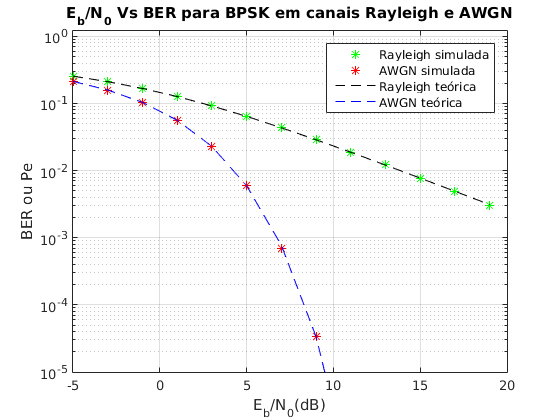

In [8]:
clear all; close all;
%% Parâmetros
N = 10^6       ;                %% Número de símbolos BPSK a serem transmitidos
EbN0dB = -5:2:20 ;               %% Valores EbN0 a simular
%% Transmissor
d = rand(1,N) > 0.5;             %% Dados binários 
x = 2*d -1   ;                   %% Símbolos BPSK: 0 representado por -1 e 1 representado por 1

%% Inicialização de vetores de BER simulada e teórica
 BER_rayleigh_simulada = zeros(length(EbN0dB),1);
 BER_awgn_simulada = zeros(length(EbN0dB),1);

%% Loop de EbNo

 for  i = 1:length(EbN0dB)
    % Canal
    % Ruído AWGN complexo com média 0 e variância 1 (vetor base)
    teste =randn(1,N);
    media = mean(real(teste));
    var = std(real(teste));
    
    noise = 1/sqrt(2)*(randn(1,N)+j*randn(1,N));
    
    % Vetor de ruído com potência proporcional a EbNo corrente
    n = noise*10^(-EbN0dB(i)/20)  ;  %%DEPOIS VÊ SE ISSO AQUI TÁ OK
    
    % Desvanecimento Rayleigh normalizado
    h = 1/sqrt(2)*(randn(1,N)+j*randn(1,N));
    
    % Sinal recebido para caso com somente ruído AWGN
    y_awgn = x + n ;
    
    % Sinal recebido para caso com desvanecimento Rayleigh e ruído AWGN
    y_rayleigh = h.*x + n;

    
    % Receptor coerente para o canal Rayleigh (supondo conhecimento de h no receptor)
    y_rayleigh_cap=y_rayleigh./h; %% Equalizador
    
    % Os símbolos positivos recebidos são 1, os demais são 0 (lembrar da simbologia)
    r_rayleigh = real(y_rayleigh_cap)>0 ;

    % Receptor para o canal somente AWGN
    r_awgn = real(y_awgn) > 0 ;
    
    % Contador de erro para o caso com Rayleigh e AWGN
    BER_rayleigh_simulada(i) = sum(bitxor(d,r_rayleigh));
    % Contador de erro para o caso com somente AWGN
    BER_awgn_simulada(i) = sum(bitxor(d,r_awgn));
 end
    % Fim do loop de EbN0
% Cálculo da BER para o caso com Rayleigh e AWGN
BER_rayleigh_simulada = BER_rayleigh_simulada/N ;
% Cálculo da BER para o caso com somente AWGN
BER_awgn_simulada = BER_awgn_simulada/N;

% Pe Teórica
EbN0=10.^(EbN0dB/10) ;           %% Eb/N0 em escala linear
% Implementação direta da equação de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 0.5*(1-sqrt(EbN0./(1+EbN0))) ;
% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5 * erfc(sqrt(EbN0));

%% Gráficos
figure(1)
% Rayleigh simulado
semilogy(EbN0dB,BER_rayleigh_simulada,'g*');
hold on;
% AWGN simulado
semilogy(EbN0dB,BER_awgn_simulada,'r*');
hold on;
% Rayleigh teórico
semilogy(EbN0dB,BER_rayleigh_teorica,'k--');
hold on;
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'b--');
hold on;
grid();
axis([-5 20 10^(-5) 1.2])
% plt.legend()
title('E_b/N_0 Vs BER para BPSK em canais Rayleigh e AWGN');
xlabel('E_b/N_0(dB)');
ylabel('BER ou Pe');
legend('Rayleigh simulada','AWGN simulada','Rayleigh teórica','AWGN teórica');

## Parte 4 de 4

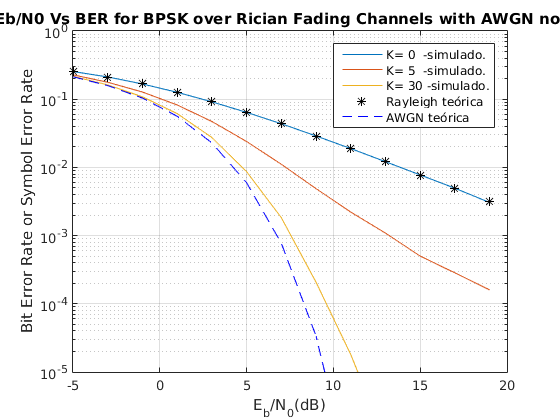

In [9]:
clear all; close all;
%% Parâmetros
N = 10^6       ;                 %% Número de símbolos BPSK a serem transmitidos
EbN0dB = -5:2:20 ;               %% Valores EbN0 a simular
EbN0 = 10.^(EbN0dB/10);  
totPower = 1;
K=[0, 5, 30];  
%% Transmissor
d = rand(N,1) > 0.5;             %% Dados binários 
x = 2*d -1   ;                       %% Símbolos BPSK: 0 representado por -1 e 1 representado por 1


%% Inicialização de vetores de BER simulada e teórica
 simBER_ricean=zeros(1,length(EbN0dB));
   
%% Loop de EbNo

 for  i = 1:length(K)
    k=K(i);
%     F=['Simulando K = {',num2str(k),'}'];
%     disp(F);
    %Parâmetro de não-centralidade e sigma de Rice
    s = sqrt(k/(k+1)*totPower);
    sigma = totPower/sqrt(2*(k+1));
     for  ik = 1:length(EbN0dB)
        % Continuação do Canal
        % Ruído AWGN complexo com média 0 e variância 1 (vetor base)
        noise = 1/sqrt(2)*[(randn(N,1)+j*randn(N,1))] ;
        % Vetor de ruído com potência proporcional a EbNo corrente    
        n = noise*10^(-EbN0dB(ik)/20) ;
        
        % Desvanecimento Rice 
        h = ((sigma*randn(N,1))+s)+j*((randn(N,1)*sigma)+0);
              
           
        % Receptor
        % Sinal recebido do canal Rice e AWGN
        y_ricean = (h.*x) + n ;
        % Receptor coerente: equalização + decisão
        y_ricean_cap = y_ricean./h ;
        r_ricean = real(y_ricean_cap)>0;
        % Contador de erro
        simBER_ricean(ik) = sum(bitxor(d,r_ricean));
        % Fim do loop de EbN0
     end
        
    simBER_ricean = simBER_ricean/N;
    semilogy(EbN0dB, simBER_ricean);
    hold on;
    %(,label='K = {} - simulado'.format(str(k)))%
 end
           
% Pes Teóricas
% Implementação direta da equação de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 1/2.*(1-sqrt(EbN0./(1+EbN0))) ;
% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 1/2. * erfc(sqrt(EbN0));

%% Gráficos
figure(1)
%'Rayleigh simulada','AWGN simulada'
semilogy(EbN0dB,BER_rayleigh_teorica,'k*');
hold on;
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'b--');
hold on;
grid();
axis([-5 20 10^(-5) 10^0])
title('Eb/N0 Vs BER for BPSK over Rician Fading Channels with AWGN noise');
xlabel('E_b/N_0(dB)');
ylabel('Bit Error Rate or Symbol Error Rate');
legend('K= 0  -simulado.','K= 5  -simulado.', 'K= 30 -simulado.','Rayleigh teórica','AWGN teórica');

# AGRADECIMENTOS 
Por fim, gostaria apenas de agradescer ao professor por sua disposição paciência e compreenção para comigo, que especialmente nessa matéria encotrou desafios que não imaginava ser tão problemáticos quanto pensava. Certamente um ponto fraco foi detectado, e me empenharei a fortalecer minhas skills em programação, também agradeço por me levar a conhecer novas liguagens de programação e recursos como o próprio jupyter notebook, me tirando assim de um a zona de conforto e me fazendo evoluir. Professor Vicente, obrigado.